In [1]:
import os
from cli import cli

path = r'C:\YandexDisk\aa_cloudmbesproceessing\aa_abp55_processing\DTM\CSV_From_Realtime'

csv_files = cli.search(path, '.csv')


for file in csv_files:
    print(f'Start processing {file}')
    xyz = []
    
    new_file = os.path.join(path,'mod_' + os.path.basename(file))
    with open(file, 'r') as f1:
        f1_content = f1.read().splitlines()
        
        for line in f1_content:
            line_content = line.split(';')
            x = line_content[0]
            y = line_content[1]
            z = line_content[2]
            xyz.append(f'{x},{y},{z}\n')
            
            
    with open(new_file, 'w') as f2:
        f2.write('x,y,z\n')
        
        for xyz_line in xyz:
            f2.write(xyz_line)
            
    print(f'file {file} done')

Searching *.csv files in directory:C:\YandexDisk\aa_cloudmbesproceessing\aa_abp55_processing\DTM\CSV_From_Realtime
Scanned filesets are: 

0 C:\YandexDisk\aa_cloudmbesproceessing\aa_abp55_processing\DTM\CSV_From_Realtime\abp55_utm34n_realtime_01_1m.csv
1 C:\YandexDisk\aa_cloudmbesproceessing\aa_abp55_processing\DTM\CSV_From_Realtime\abp55_utm34n_realtime_02_1m.csv
2 C:\YandexDisk\aa_cloudmbesproceessing\aa_abp55_processing\DTM\CSV_From_Realtime\abp55_utm34n_realtime_03_1m.csv
3 C:\YandexDisk\aa_cloudmbesproceessing\aa_abp55_processing\DTM\CSV_From_Realtime\abp55_utm34n_realtime_04_1m.csv
4 C:\YandexDisk\aa_cloudmbesproceessing\aa_abp55_processing\DTM\CSV_From_Realtime\abp55_utm34n_realtime_05_2m.csv
5 C:\YandexDisk\aa_cloudmbesproceessing\aa_abp55_processing\DTM\CSV_From_Realtime\abp55_utm34n_realtime_06_2m.csv
6 C:\YandexDisk\aa_cloudmbesproceessing\aa_abp55_processing\DTM\CSV_From_Realtime\abp55_utm35n_realtime_01_1m.csv
Start processing C:\YandexDisk\aa_cloudmbesproceessing\aa_abp55

In [1]:

%load_ext autoreload
%autoreload 2

import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from numpy import cos,pi,sin,pi,arccos
from pathlib import Path

# lab_a=Path('../Lab_A/') # Get the path to your Lab_A folder
# sys.path.append(str(lab_a.resolve())) # add the Lab_A folder to the list of paths 

from gebcotrainingprog_coding.position import *
from gebcotrainingprog_coding.SSP import SSP
from gebcotrainingprog_coding.analyzess import AnalyzeSS

In [2]:
# Get a list of the files in the Data Directory

data=Path('./data/mvp/') # Get the path to your data folder
ls=list(data.glob('*.txt')) # Get a list of data files holding sound speed profiles

if 'ana_ss' in locals():
    ana_ss.SSPs.clear()
else: 
    ana_ss = AnalyzeSS() # Create an AnalyzeSS for analysing the sound speed profiles
    
    
# Add the SSPs to ana_ss for processing
for f in ls:
    # Create a new SSP object for the current data file
    ssp=SSP()
    
    # Read the data file into the SSP
    ssp.read_mvp_file(str(f.resolve()))
    
    # Add the SSP to the AnalyzeSS object
    ana_ss.SSPs.append(ssp)

Opening sound speed profile data file:D:\aa_gitrepositories\pyEchoManager\data\mvp\CoverageCalc2.txt
PC Time: 12:39:15
PC Date: 10-04-2004
GPS Position: $GPGGA,123836.00,5636.94215,N,05655.38694,W,2,8,1.1,27.95,M,7.94,M,12,0108*4F
GPS Time: $GPZDA,123836.00,4,10,2004,+0,+0*58
Bottom Depth: 2247.6
Ship Speed: 10.0
**********
Version: 2.20
Line Number: 00000
Instrument Type: 9, SBE_911plus_CTD
Serial Number: 732
Press Offset: 0.0
AUX. Serial Sensors: 0
Number 5V Inputs: 0
Survey Latitude: 45.000
BOT F1: $GPVTG,220.1,T,,M,9.97,N,18.47,K*5C
BOT F2: $GPGGA,123836.00,5636.94215,N,05655.38694,W,2,8,1.1,27.95,M,7.94,M,12,0108*4F
BOT F3: $GPZDA,123836.00,4,10,2004,+0,+0*58
BOT F4: 
BOT F5: $EMDPT,2247.57,0.0
BOT F6: 
BOT F7: 
BOT F8: 
BOT F9: 
BOT F10: 
Ndecimate: 0
**********

28
Opening sound speed profile data file:D:\aa_gitrepositories\pyEchoManager\data\mvp\Oct4_slope-1.102m1.txt
PC Time: 12:39:15
PC Date: 10-04-2004
GPS Position: $GPGGA,123836.00,5636.94215,N,05655.38694,W,2,8,1.1,27.95,M

d:\aa_gitrepositories\pyEchoManager\gebcotrainingprog_coding\SSP.py:427: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(empty_string_labels)


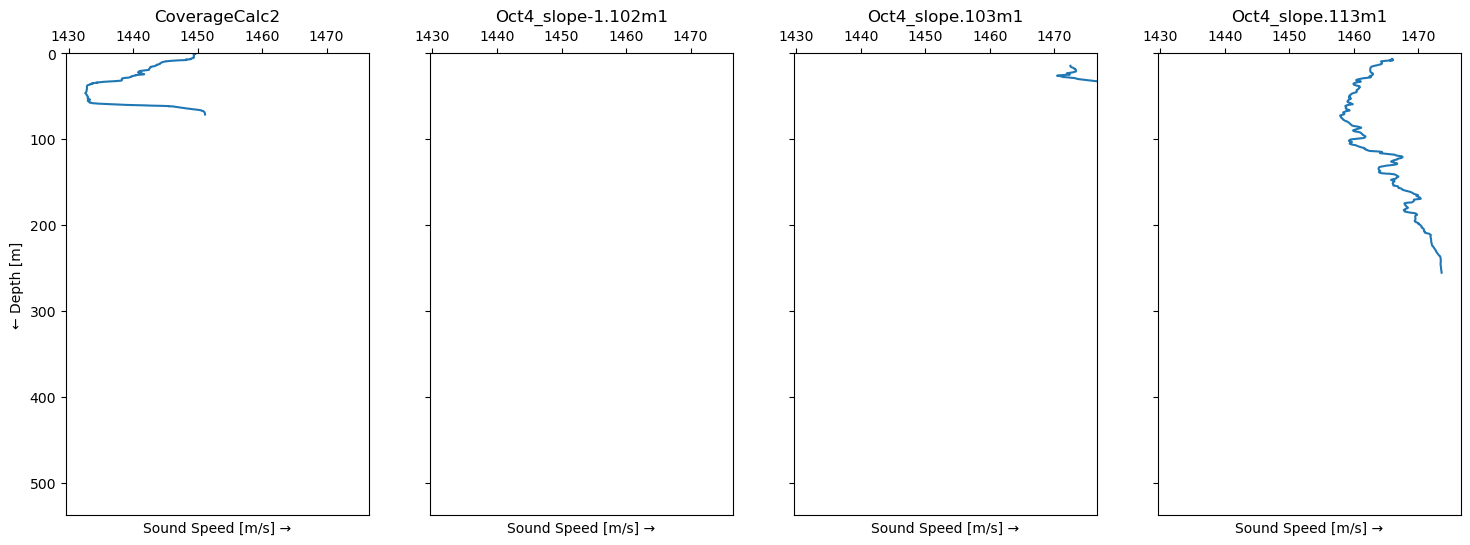

In [3]:
n_ssps = len(ana_ss.SSPs)

fig = plt.figure(figsize=(18, 6))

# First get some data allowing the plots to be scaled correctly

min_ss = 10000
max_ss = 0

max_dep = 0
for i in range(n_ssps):
    if ana_ss.SSPs[i].d[-2] > max_dep:
        max_dep = ana_ss.SSPs[i].d[-2]
    if min(ana_ss.SSPs[i].c[0:-1]) < min_ss:
        min_ss = min(ana_ss.SSPs[i].c[0:-2])
    elif max(ana_ss.SSPs[i].c) > max_ss:
        max_ss = max(ana_ss.SSPs[i].c[0:-2])
        
dep_range = (0, max_dep+max_dep/20)
ss_range = (min_ss-3,max_ss+3)
ax = plt.subplot(1,n_ssps,1)
ana_ss.SSPs[0].draw(False, ax, dep_range, ss_range,True)
for i in range(1,n_ssps):
    ax = plt.subplot(1,n_ssps,i+1)
    ana_ss.SSPs[i].draw(False, ax, dep_range, ss_range, False)

In [12]:
for i in range(n_ssps):
    if os.path.basename(ana_ss.SSPs[i].metadata['name']) == 'CoverageCalc2.txt':
        select_profile = i
        break
    
swath_cov = 125
sw_start = (180 - swath_cov)/2
sw_end = 180 - sw_start

th = np.linspace(sw_start,sw_end,101) # depression angles in degrees
th *= pi/180                # Convert to degrees
n_beams = len(th)
d_start = 5.76
depth = 22
# depth = 44

true_TWTT = np.zeros((n_ssps,n_beams))
true_rad_dist = np.zeros((n_ssps,n_beams))
for i in range(n_ssps):
    ss_start = ana_ss.SSPs[i].determine_c(d_start)
    for j in range(n_beams):
        true_TWTT[i,j],true_rad_dist[i,j],_,_= ana_ss.SSPs[i].determine_twtt(d_start, th[j], ss_start, depth)
        
# print(true_TWTT[select_profile],)
# print(true_rad_dist[select_profile],)
swath_width = true_rad_dist[select_profile][0]*2
intersec = 10
swath_width_intersec = (swath_width/2 - swath_width/2*(intersec/100))*2

print(f'Swath width is: {swath_width:.2f} m')
print(f'Half-swath width is: {swath_width/2:.2f}')
print(f'For {intersec}% intersec, swath width is: {swath_width_intersec} or 2x{swath_width_intersec/2}')

Swath width is: 61.38 m
Half-swath width is: 30.69
For 10% intersec, swath width is: 55.245159259318555 or 2x27.622579629659278


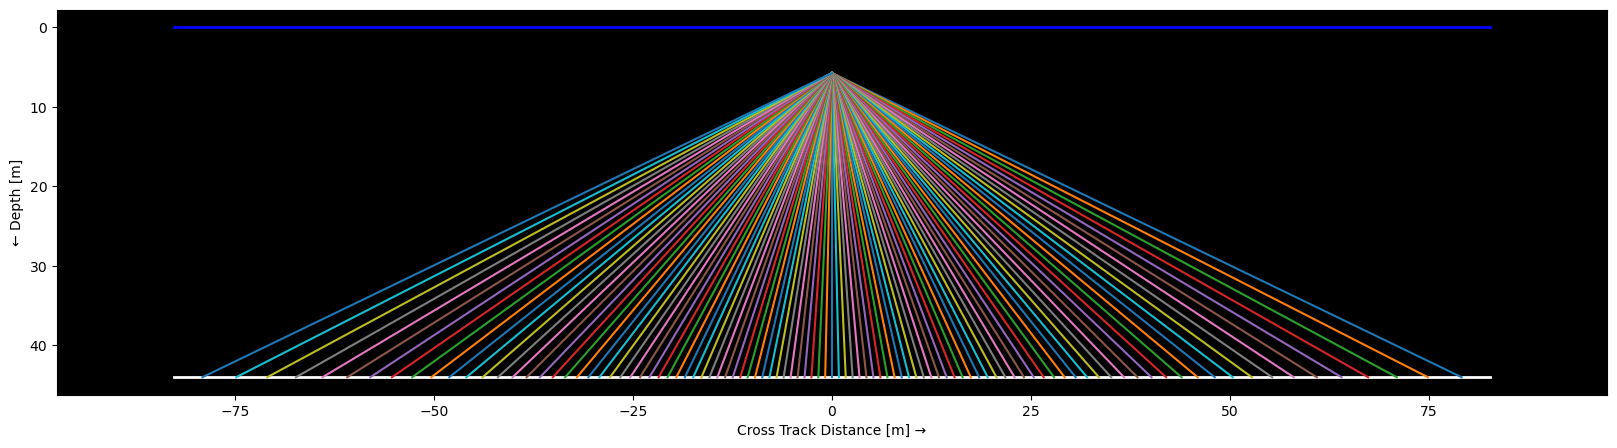

In [6]:
fig = plt.figure(figsize=(20, 5))  # Create a 20*5 plot area
ax = plt.gca()                     # Get the current axes
ax.set_facecolor((0, 0, 0))        # Set the background color of the plot area to black

# Plot the water surface
plt.plot((np.min(true_rad_dist),np.max(true_rad_dist)),(0,0),'b',linewidth=2)

# Plot the bottom in white 
plt.plot((np.min(true_rad_dist),np.max(true_rad_dist)),(depth,depth),'w',linewidth=2)

# Add the center of each beam for the selected profile (as a straight line from the transducer to the bottom)

for i in range(n_beams):
    plt.plot((0,true_rad_dist[select_profile,i]),(d_start,depth))

ax.invert_yaxis()
ax.axis('equal')
plt.xlabel('Cross Track Distance [m] →')
plt.ylabel('← Depth [m]');

In [7]:
#select_profile = 5
model_depth = np.zeros((n_ssps,n_beams))
model_rad_dist = np.zeros((n_ssps,n_beams))
for i in range(n_ssps):
    ss_start = ana_ss.SSPs[select_profile].determine_c(d_start)
    for j in range(n_beams):
        model_depth[i,j],model_rad_dist[i,j],_,_= ana_ss.SSPs[select_profile].determine_depth(d_start, th[j], ss_start, true_TWTT[i,j])


d:\aa_gitrepositories\pyEchoManager\gebcotrainingprog_coding\SSP.py:271: RuntimeWarning: invalid value encountered in arccos
  th = arccos(self.c[0:]*ray_c)


In [8]:
depth_errors = model_depth - depth
rad_dist_errors = model_rad_dist - true_rad_dist[select_profile,]

print(depth_errors[select_profile,])


[ 1.11582210e-09  3.98252098e-10  6.77104595e-10  3.28789440e-10
  5.15910870e-10 -2.58403077e-10 -5.58209479e-10  3.50347307e-10
  5.16507725e-10 -8.60381988e-10 -1.25569244e-09  1.36860479e-09
 -2.01573158e-09 -1.32224898e-10 -1.18994592e-09 -1.08103393e-09
  1.90119209e-09 -2.34692266e-10  3.23041149e-10  1.94646788e-09
  2.59629473e-09 -1.72796888e-10 -3.78487641e-09  3.02824787e-09
  1.30141586e-09  2.51593235e-09  4.56552129e-09  5.53235679e-10
  3.10190984e-09  4.84855889e-09 -3.96939015e-09  2.48322607e-09
 -1.88308036e-10  2.33991670e-09  2.15231211e-09  3.21205107e-09
 -1.76385129e-10  6.46122800e-09  3.09903214e-10 -2.15026574e-09
 -2.64621747e-09  3.04319769e-09  4.55901272e-09 -4.97681185e-09
 -2.00739692e-09 -4.82756946e-09 -3.16828945e-08 -1.71699455e-08
  2.32093029e-08 -9.98088936e-08 -1.00000000e-02 -9.98088936e-08
 -4.77209099e-08 -1.71699455e-08  3.81875509e-09 -4.82756946e-09
 -2.00739692e-09  1.28244011e-08  4.55901272e-09  1.69267409e-08
  1.16573631e-08 -1.35487

In [9]:
tolerance = 10**-3   # If the results differ by less than 1mm we will assign them to be a match

# Test the results from the depths
if any(abs(depth_errors[select_profile,])>tolerance):
    print("Results do not match!")
else:
    print( "Results match")
    
# Specifically set a value to zero if smaller than the tolerance

depth_errors[abs(depth_errors)<tolerance]=0

Results do not match!


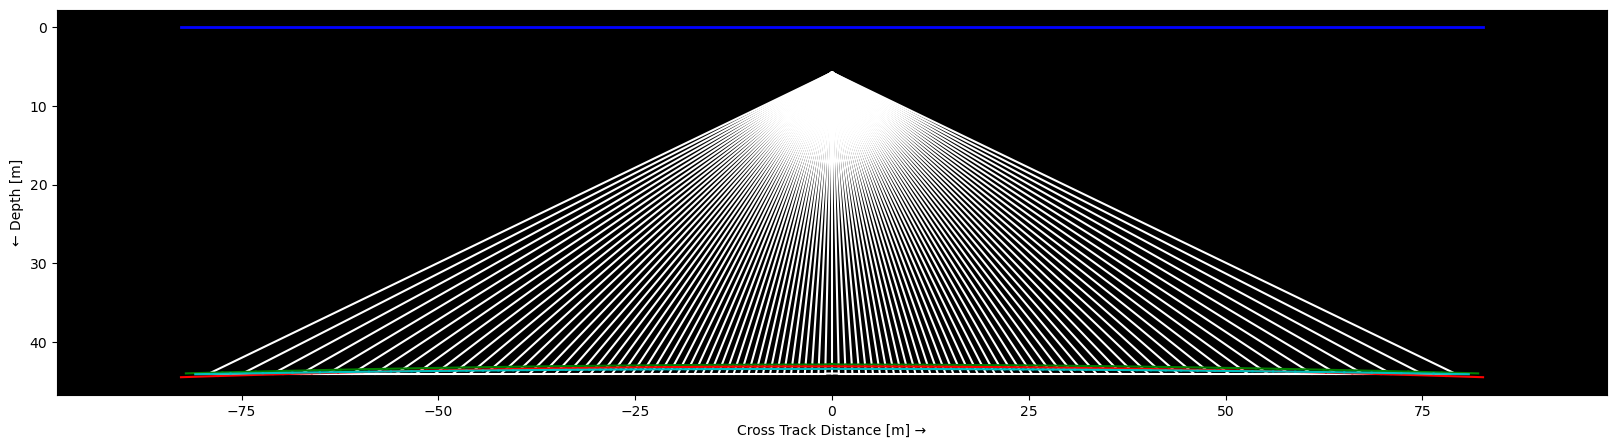

In [10]:
fig = plt.figure(figsize=(20, 5))  # Create a 20*5 plot area
ax = plt.gca()                     # Get the current axes
ax.set_facecolor((0, 0, 0))        # Set the background color of the plot area to black

# Plot the water surface
plt.plot((np.min(true_rad_dist),np.max(true_rad_dist)),(0,0),'b',linewidth=2)

# Plot all the beams and bottom segments for the selected profile
for j in range(n_beams):
    plt.plot((0,true_rad_dist[select_profile,j]),(d_start,model_depth[select_profile,j]),'w')

plt.plot((true_rad_dist[select_profile,0],true_rad_dist[select_profile,1]), \
             (model_depth[select_profile,0],model_depth[select_profile,1]))

# Create an list of colors

colors = ('b','g','r','c','m','y')

for i in range(n_ssps):
    if i == select_profile:
        color = 'w'
    else:
        color = colors[i%6]
    for j in range(n_beams-1):
        plt.plot((true_rad_dist[i,j],true_rad_dist[i,j+1]), \
             (model_depth[i,j],model_depth[i,j+1]),color)


ax.invert_yaxis()
ax.axis('equal')
plt.xlabel('Cross Track Distance [m] →')
plt.ylabel('← Depth [m]');
plt.show()

C:\Users\IvanDudkov\AppData\Local\Temp\ipykernel_11600\3158499896.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(n_ssps*2,2,(i-1)*4+1)


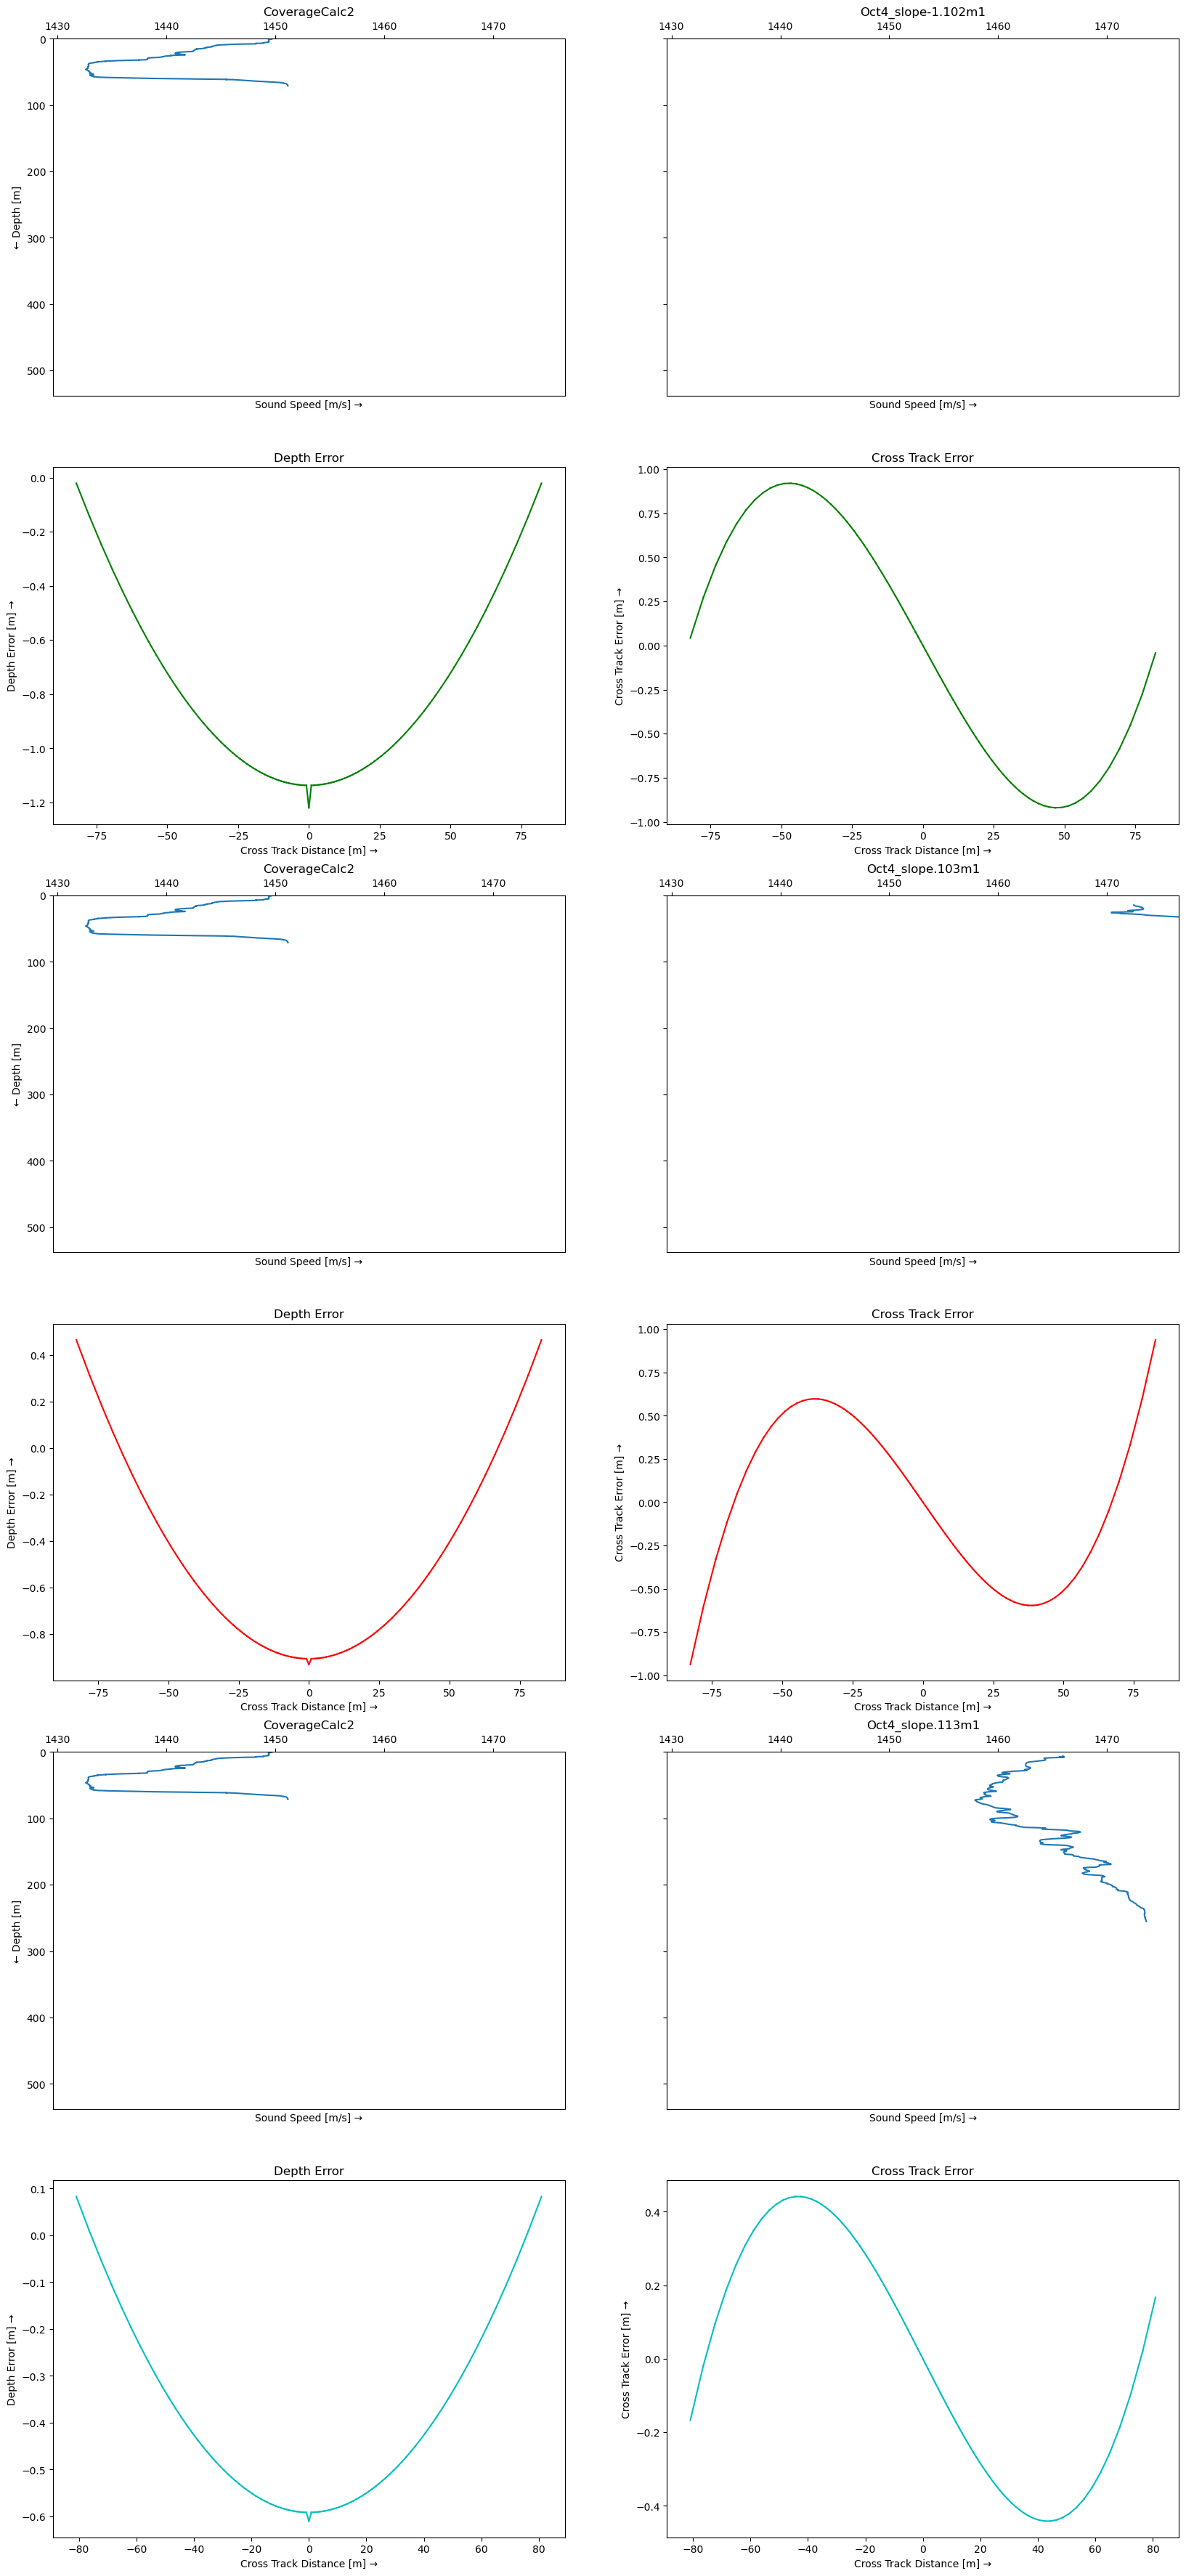

In [14]:
fig = plt.figure(figsize=(20, 15*n_ssps))  # Create a 20*5 plot area
ax = plt.gca()                     # Get the current axes
ax.set_facecolor((0, 0, 0))        # Set the background color of the plot area to black

for i in range(1,n_ssps):
    ax = plt.subplot(n_ssps*2,2,(i-1)*4+1)
    ana_ss.SSPs[select_profile].draw(False, ax, dep_range, ss_range, True)
    ax = plt.subplot(n_ssps*2,2,(i-1)*4+2)
    ana_ss.SSPs[i].draw(False, ax, dep_range, ss_range, False)
    ax = plt.subplot(n_ssps*2,2,(i-1)*4+3)
    plt.xlabel('Cross Track Distance [m] →')
    plt.ylabel('Depth Error [m] →')
    ax.title.set_text('Depth Error')
    color = colors[i%6]
    for j in range (n_beams-1):
        plt.plot((true_rad_dist[i,j],true_rad_dist[i,j+1]), \
             (depth_errors[i,j],depth_errors[i,j+1]),color)
    ax = plt.subplot(n_ssps*2,2,(i-1)*4+4)
    plt.xlabel('Cross Track Distance [m] →')
    plt.ylabel('Cross Track Error [m] →')
    ax.title.set_text('Cross Track Error')
    for j in range (n_beams-1):
        plt.plot((true_rad_dist[i,j],true_rad_dist[i,j+1]), \
             (rad_dist_errors[i,j],rad_dist_errors[i,j+1]),color)
    